# Online Taxi Transaction Clustering Machine Learning

**In this project, I will be performing an unsupervised clustering from online taxi transaction dataset. This project focuses on making the market segment increase for future customer promo insight based on the Database.**

## Table of Content
1. Importing Libraries
2. Loading the Dataset
3. Data Understanding & Preprocessing
4. Clustering
5. Evaluating Models
6. Conclusion and Recommendation

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('ONLINETAXI_TRANSACTION.csv')
df.head()

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165


### Data Understanding & Preprocessing

- Vendor: A code indicating the TPEP provider that provided the record. TPEP is a vendor who has [contracted with] been authorized by the Commission to install and maintain the Taxicab Technology System in Taxicabs.
- passenger_count: The number of passengers in the vehicle.
- trip_distance: The elapsed trip distance in miles reported by the taximeter
- rate_code: The final rate code in effect at the end of the trip.
    - 1 = Standard Rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride


- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip

- payment_type: A numeric code signifying how the passenger paid for the trip. 
- fare_amount: The time-and-distance fare calculated by the meter.
- extra: Miscellaneous extras and surcharges.
- mta_tax: Tax for the Metropolitan Transportation Authority
- tip_amount: This field is automatically populated for credit card tips. Cash tips are not included.
- tolls_amount: Total amount of all tolls paid in trip.
- imp_surcharge: 0.30 improvement surcharge assessed trips.
- total_amount: The total amount charged to passengers. Does not include cash tips.
- pickup_location_id: TLC Taxi Zone in which the taximeter was engaged
- dropoff_location_id: TLC Taxi Zone in which the taximeter was disengaged

###### Source: https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc?select=trip_data_dictionary.pdf

Features that we are going to use for this Project is :
- trip_distance
- fare_amount

We choose this Features because we consider this Features is most impactful for Market Segment to increase future customer promo.

**In this section we are going to :**
- Check features information
- Check Missing Value
- Feature Engineering

In [3]:
# Check features information
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'Features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,VENDOR,int64,0,0.0,3,"[4, 1]"
1,passenger_count,int64,0,0.0,9,"[9, 2]"
2,trip_distance,float64,0,0.0,2533,"[6.78, 32.81]"
3,rate_code,int64,0,0.0,7,"[2, 1]"
4,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
5,payment_type,int64,0,0.0,4,"[4, 2]"
6,fare_amount,float64,0,0.0,511,"[33.5, 85.0]"
7,extra,float64,0,0.0,11,"[4.5, -0.5]"
8,mta_tax,float64,0,0.0,5,"[2.38, -0.5]"
9,tip_amount,float64,0,0.0,1449,"[22.82, 9.39]"


In [4]:
# Check Missing Value
df.isna().sum()

VENDOR                 0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

Insight : There is no null or missing value in this Dataset, so we don't have to do Data Cleaning

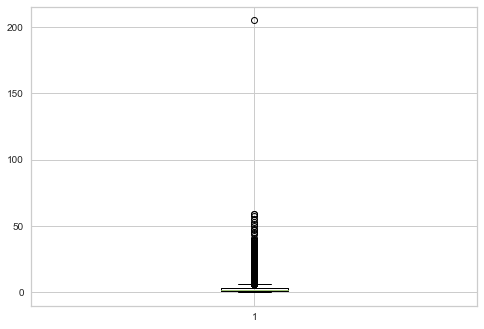

In [5]:
# Checking for Outliers in trip_distance feature
plt.boxplot(df['trip_distance'])
plt.show()

In [6]:
# We remove only the highest one
df['trip_distance'].max()

204.81

In [7]:
# Create Dataset without Outliers in trip_distance Feature
df = df[df['fare_amount']!=204.81]

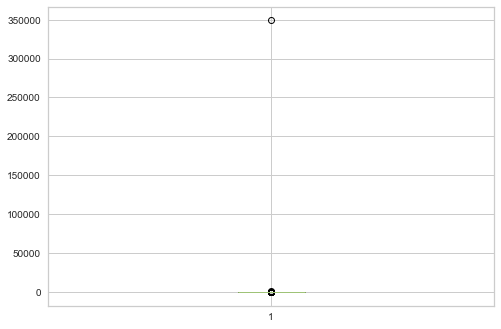

In [8]:
# Checking for Outliers in fare_amount feature
plt.boxplot(df['fare_amount'])
plt.show()

In [9]:
# We remove only the highest one
df['fare_amount'].max()

349026.72

In [10]:
# Create Dataset without Outliers in fare_amount Feature
df = df[df['fare_amount']!=349026.72]

In [11]:
# Check Data description
df.describe()

,VENDOR,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000,224947.000000
mean,1.590779,1.594442,2.942187,1.047718,1.313092,13.015785,0.331487,0.497097,1.881604,0.350437,0.299524,16.379502,162.899172,160.977208
std,0.517668,1.242624,3.795164,0.595423,0.482046,11.805384,0.462291,0.042280,2.573504,1.522919,0.016075,14.478380,66.459335,70.480375
min,1.000000,0.000000,0.000000,1.000000,1.000000,-146.000000,-4.500000,-0.500000,-5.000000,-5.760000,-0.300000,-146.800000,1.000000,1.000000
25%,1.000000,1.000000,0.970000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.500000,114.000000,107.000000
50%,2.000000,1.000000,1.600000,1.000000,1.000000,9.500000,0.000000,0.500000,1.440000,0.000000,0.300000,11.800000,162.000000,162.000000
75%,2.000000,2.000000,3.020000,1.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,233.000000,233.000000
max,4.000000,9.000000,204.810000,99.000000,4.000000,1020.500000,4.500000,3.000000,120.000000,42.280000,1.000000,1034.800000,265.000000,265.000000


In [12]:
# Looking for anomalies number
anom = df[(df['fare_amount'] < 0) | (df['extra'] < 0) | (df['mta_tax'] < 0) | (df['tip_amount'] < 0) | (df['tolls_amount'] < 0) | (df['imp_surcharge'] < 0) | (df['total_amount'] < 0)]
anom

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
5660,2,1,0.00,1,N,3,-2.50,0.0,-0.5,-0.66,0.0,-0.3,-3.96,193,193
7399,2,1,0.00,5,N,3,-46.06,0.0,0.0,-5.00,0.0,-0.3,-51.36,164,164
15039,2,1,0.11,1,N,3,-2.50,0.0,-0.5,0.00,0.0,-0.3,-3.30,234,234
15083,2,4,0.16,1,N,3,-3.50,0.0,-0.5,0.00,0.0,-0.3,-4.30,143,143
15176,2,3,0.28,1,N,4,-4.50,-0.5,-0.5,0.00,0.0,-0.3,-5.80,234,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23754,2,1,0.43,1,N,4,-4.00,-1.0,-0.5,0.00,0.0,-0.3,-5.80,262,263
23938,2,3,0.92,1,N,3,-4.50,-0.5,-0.5,0.00,0.0,-0.3,-5.80,263,75
24214,2,2,0.45,1,N,4,-3.50,-0.5,-0.5,0.00,0.0,-0.3,-4.80,234,107
24417,2,1,0.00,2,N,3,-52.00,-4.5,-0.5,0.00,0.0,-0.3,-57.30,13,13


In [13]:
# All anomalies number contain fre_amount < 0, so we need to drop fare_amount < 0
df[df['fare_amount'] < 0]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
5660,2,1,0.00,1,N,3,-2.50,0.0,-0.5,-0.66,0.0,-0.3,-3.96,193,193
7399,2,1,0.00,5,N,3,-46.06,0.0,0.0,-5.00,0.0,-0.3,-51.36,164,164
15039,2,1,0.11,1,N,3,-2.50,0.0,-0.5,0.00,0.0,-0.3,-3.30,234,234
15083,2,4,0.16,1,N,3,-3.50,0.0,-0.5,0.00,0.0,-0.3,-4.30,143,143
15176,2,3,0.28,1,N,4,-4.50,-0.5,-0.5,0.00,0.0,-0.3,-5.80,234,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23754,2,1,0.43,1,N,4,-4.00,-1.0,-0.5,0.00,0.0,-0.3,-5.80,262,263
23938,2,3,0.92,1,N,3,-4.50,-0.5,-0.5,0.00,0.0,-0.3,-5.80,263,75
24214,2,2,0.45,1,N,4,-3.50,-0.5,-0.5,0.00,0.0,-0.3,-4.80,234,107
24417,2,1,0.00,2,N,3,-52.00,-4.5,-0.5,0.00,0.0,-0.3,-57.30,13,13


In [14]:
# Remove Anomalies number
df = df[df['fare_amount'] >= 0]

In [15]:
# Recheck Data description
df.describe()

,VENDOR,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
count,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000,224806.000000
mean,1.590522,1.594228,2.943717,1.047637,1.311851,13.029846,0.331931,0.497720,1.882809,0.350683,0.299900,16.396459,162.899304,160.978137
std,0.517729,1.242497,3.795670,0.595345,0.479482,11.786793,0.461850,0.034177,2.573839,1.523317,0.005744,14.459604,66.458013,70.485222
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,0.970000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.570000,114.000000,107.000000
50%,2.000000,1.000000,1.600000,1.000000,1.000000,9.500000,0.000000,0.500000,1.450000,0.000000,0.300000,11.800000,162.000000,162.000000
75%,2.000000,2.000000,3.020000,1.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,233.000000,233.000000
max,4.000000,9.000000,204.810000,99.000000,4.000000,1020.500000,4.500000,3.000000,120.000000,42.280000,1.000000,1034.800000,265.000000,265.000000


Insight : We have cleared Dataset that contains below 0 in each Features

**Because we don't need to use feature with type __object__, so we don't need to do feature Encoding**

### Clustering

#### Things we are going to do in Clustering :
- We use 2 Features that already choosen
- Using Elbow Method to determine the number of clusters to be formed
- I will be performing clustering via KMeans clustering. KMeans clustering is most common used methods for clustering

In [16]:
# 2 Features that wee will use for fit X
promo = df[['trip_distance', 'fare_amount']].values
X = promo

Elbow Method to determine the number of clusters to be formed:


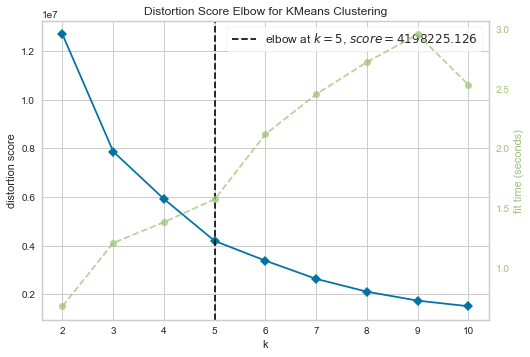

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [18]:
# Using KMeans method
model_KM = KMeans(n_clusters=5, random_state=1)

In [19]:
# Fitting model
cluster = model_KM.fit_predict(X)

In [20]:
# Create new Feature for segmentation
df['Segment'] = cluster

In [21]:
# Cleaned Dataset
df.head()

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,Segment
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28,4
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33,4
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249,4
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161,4
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165,4


In [22]:
# Checking centroid position
centroid = model_KM.cluster_centers_

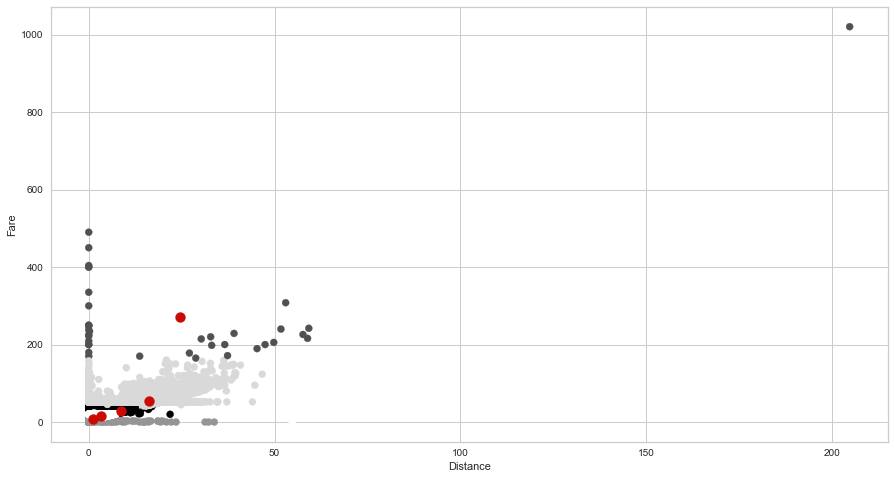

In [23]:
# Centroid Position in Scatterplot
plt.figure(figsize=(15, 8))
plt.scatter(x=X[:, 0], y=X[:, 1], c=cluster, s=50)
plt.scatter(x=centroid[:, 0], y=centroid[:, 1], c='r', s=100)
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [24]:
# Save cleaned Dataset for modelling using Tableau
df.to_csv('clean.csv')

### Evaluating Models

Insight : Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

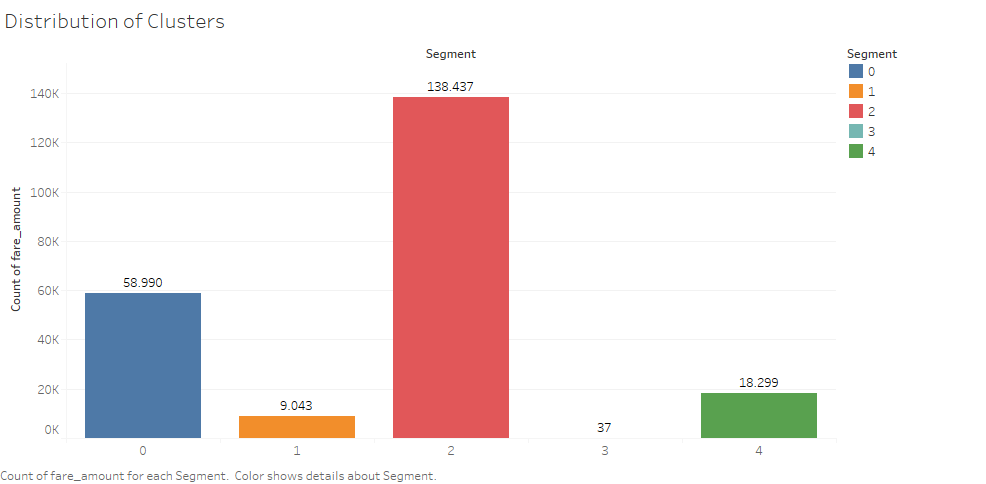

Insight : The Segment seems not fairly Distributed, which is many data gather in Segment 2, and least in Segment 3

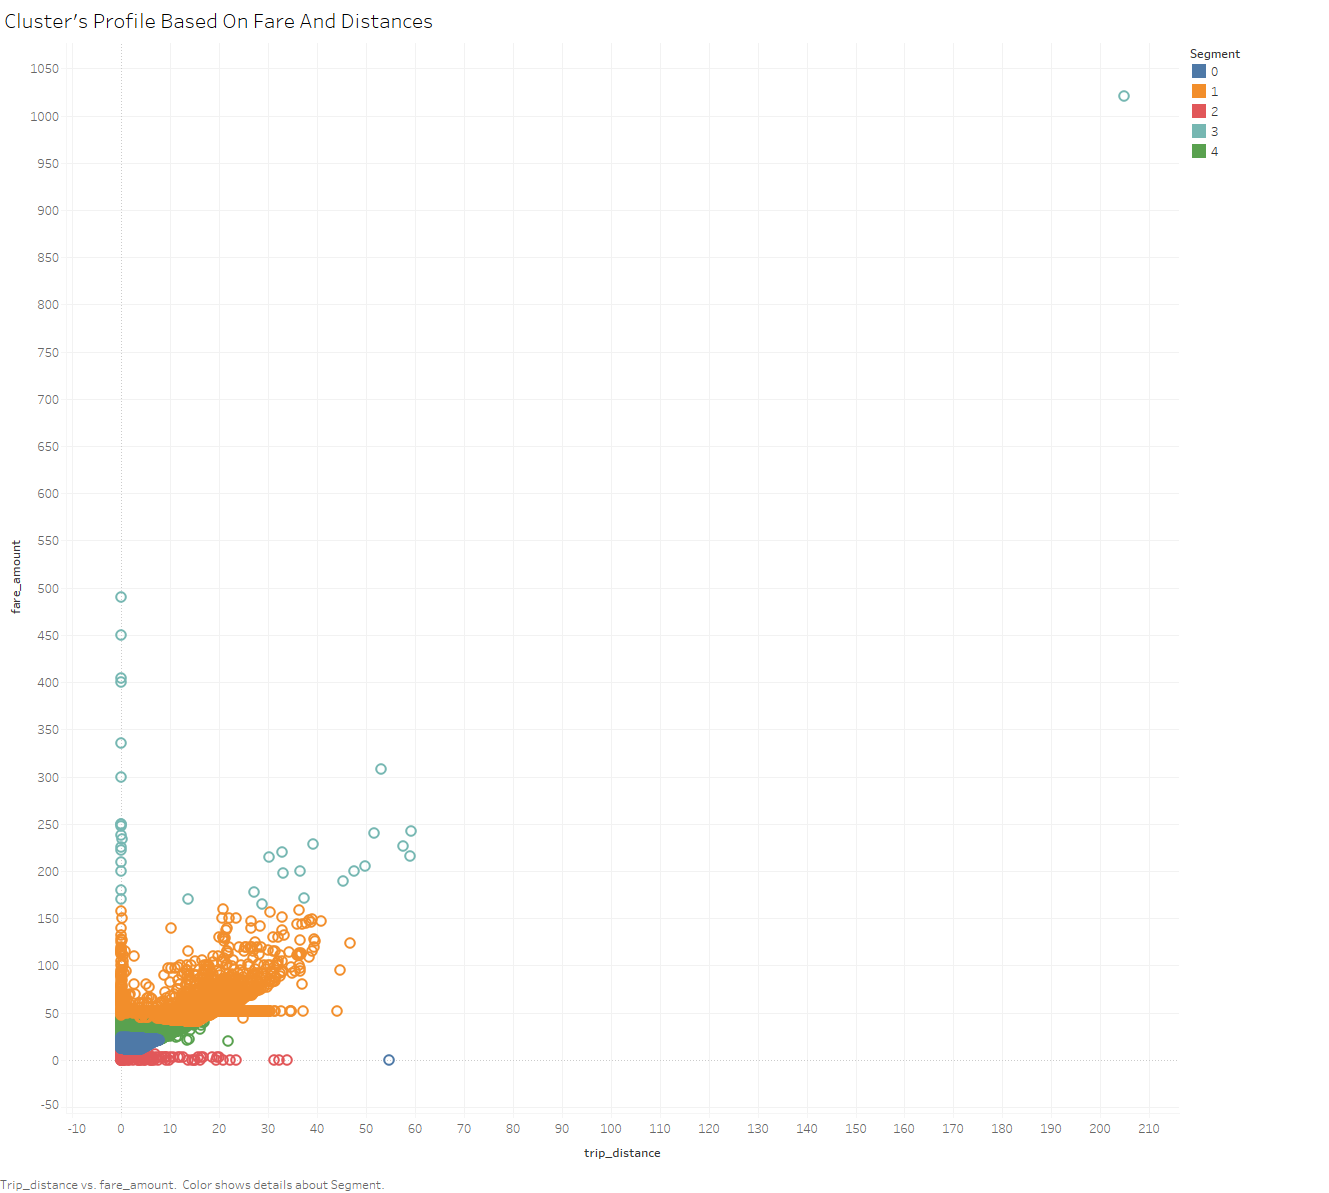

Insight : Fare vs Distances plot shows the clusters pattern

- Segment 0 : low - medium Fare & short Distance
- Segment 1 : medium - high Fare & short - far Distance
- Segment 2 : low Fare & short - medium Distance
- Segment 3 : high Fare & short - far Distance
- Segment 4 : medium Fare & short Distance

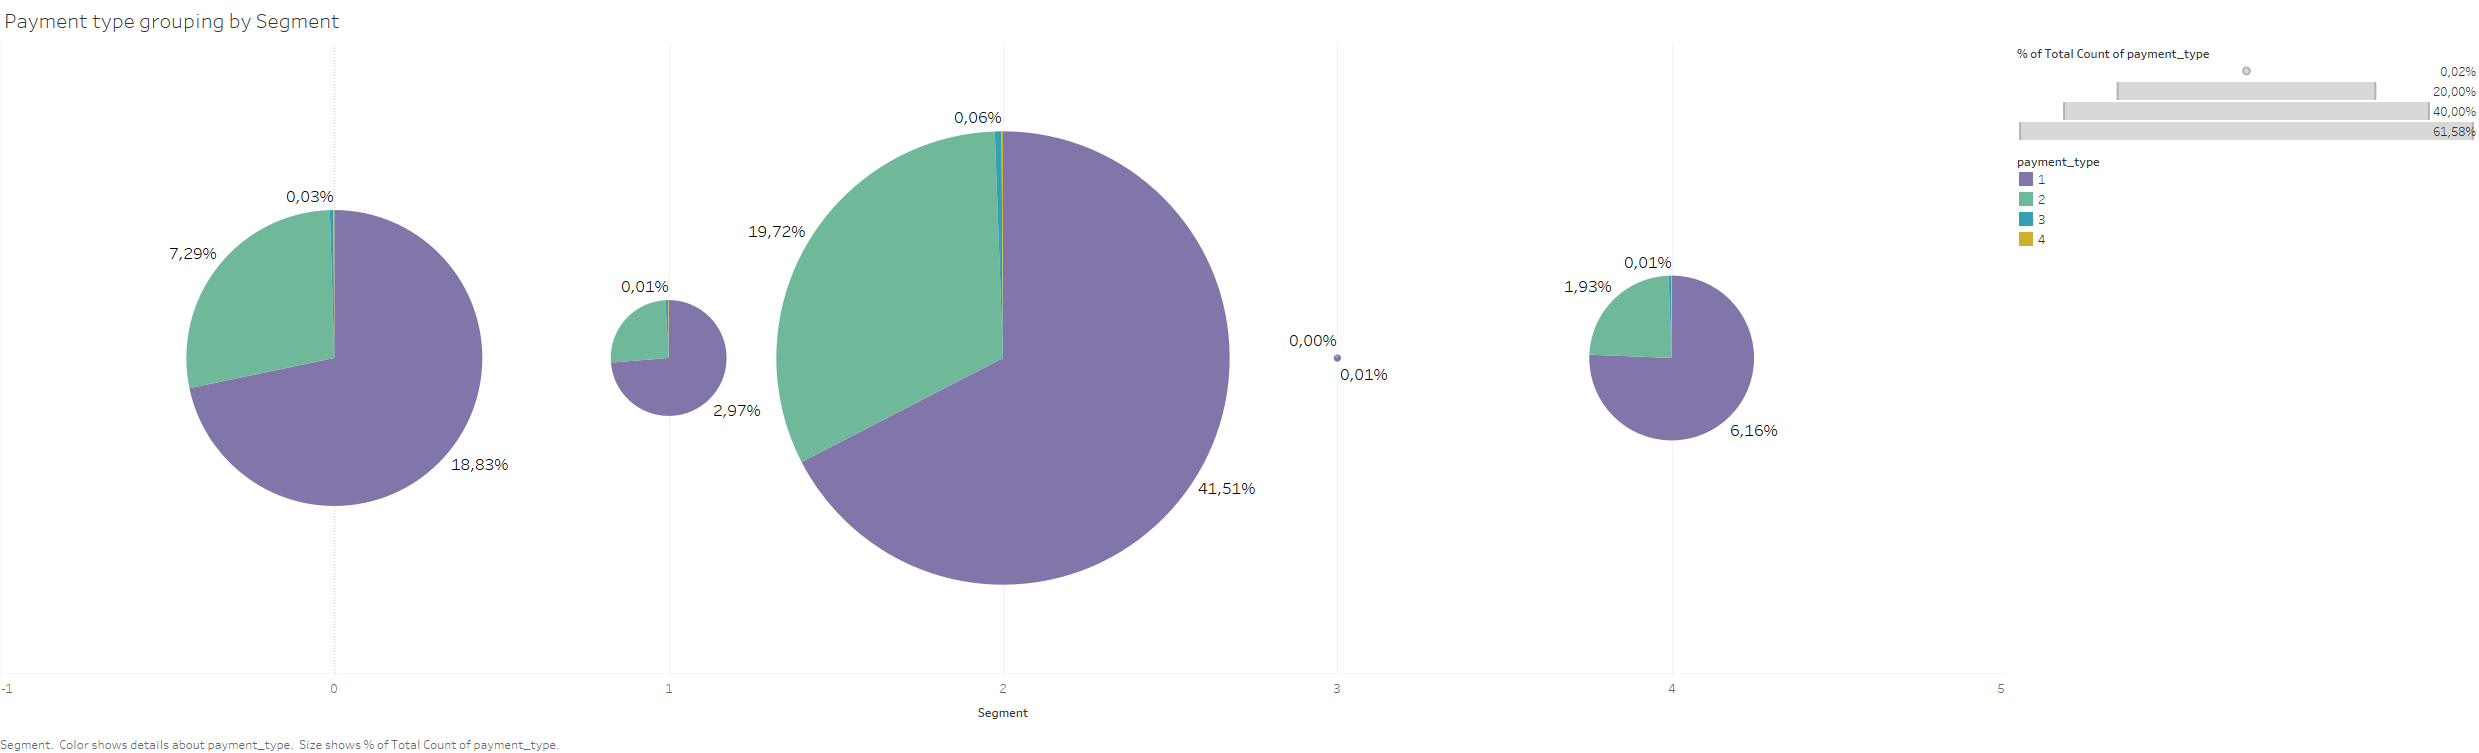

Insight : Percentage total of payment type each Segment

- Every Segment mostly using payment_type 1 to purchase the Fare
- Customers in each Segment least using payment_type 4

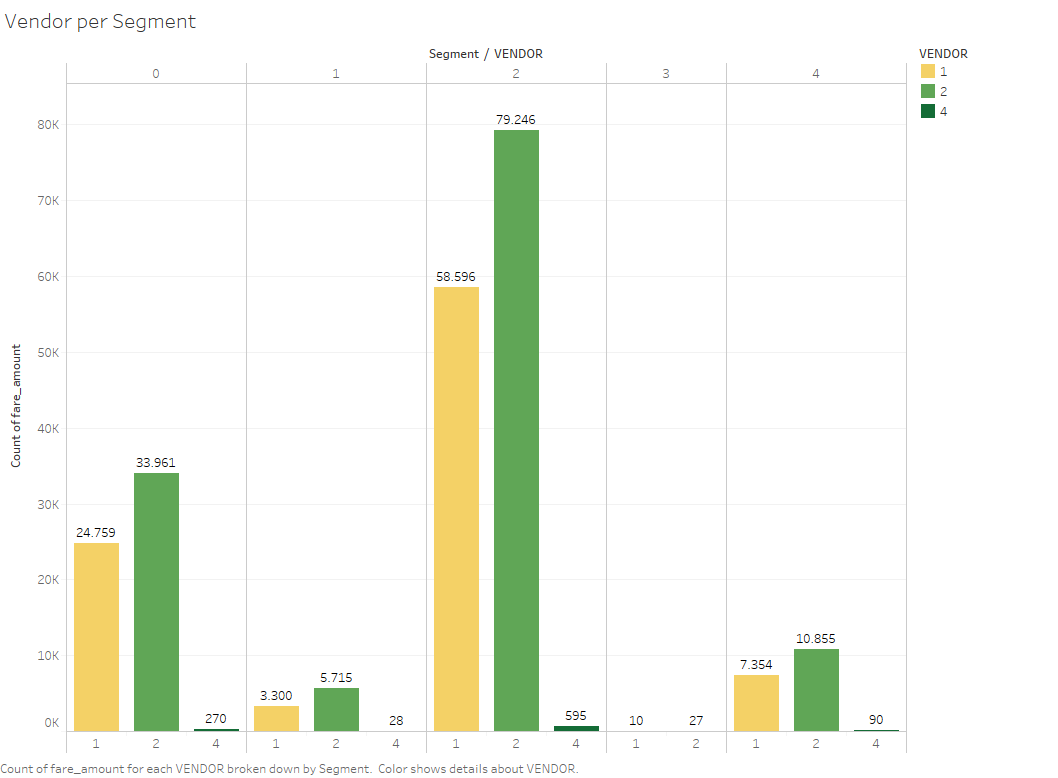

Insight : 

- Each Segment mostly provided by Vendor 2, followed by Vendor 1
- Each Segment least provided by Vendor 4, and in Segment 3 there no Vendor 4 provider

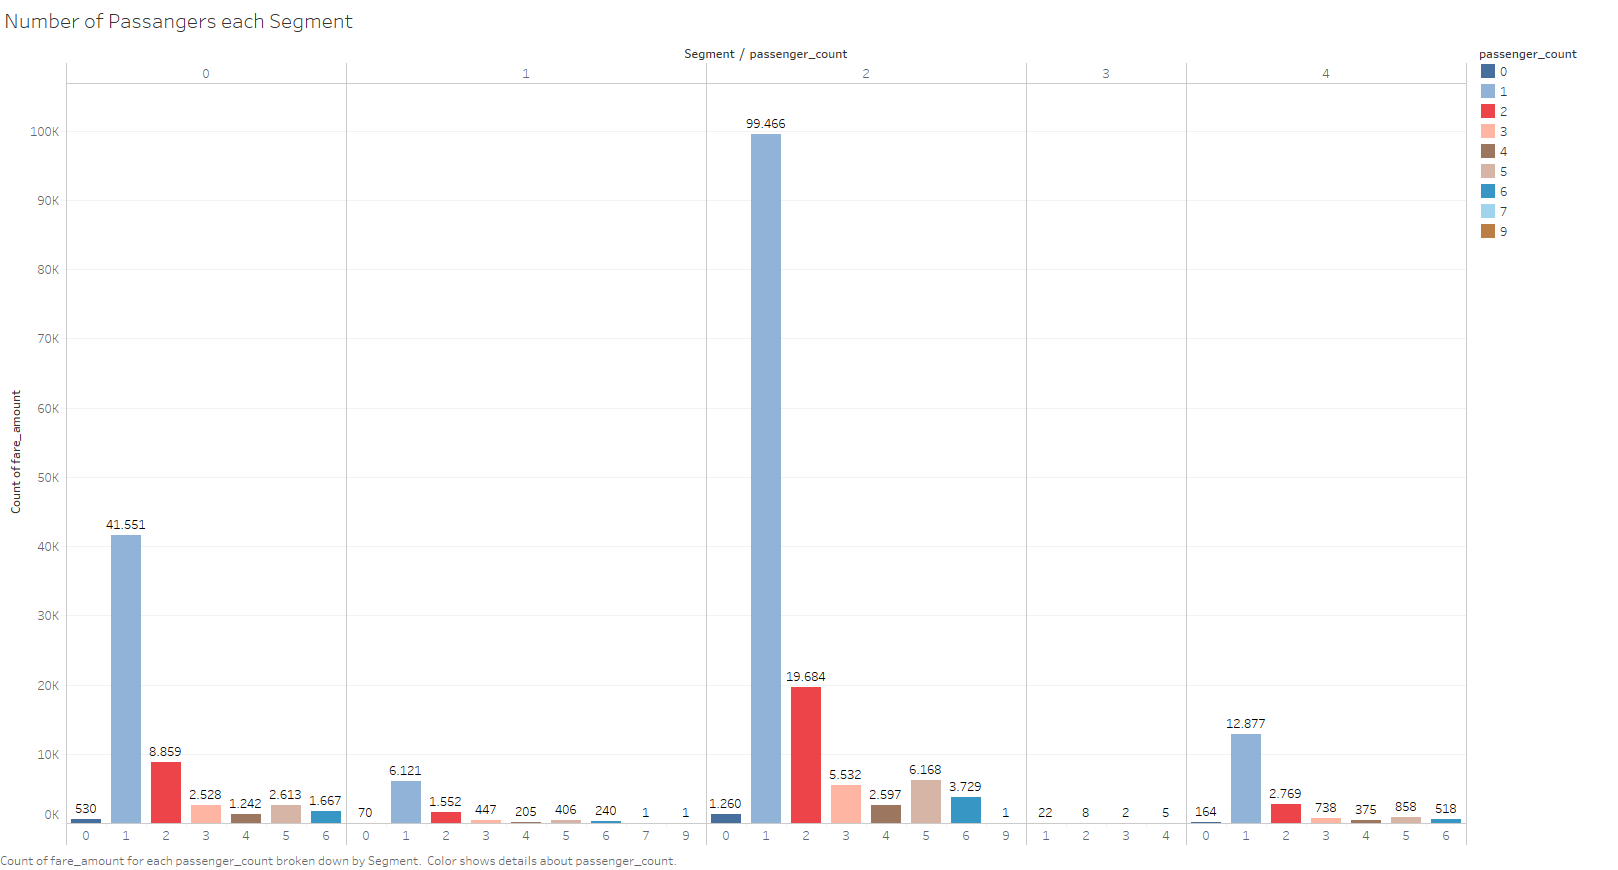

Insight : Most Segment has only 1 Passenger

### Conclusion and Recommendation

**Conclusion** :


    - About Segment 0 :
    
        - Second choice that is usualy used by customers
        
        - Mostly customers pay low - medium Fare & for travel short Distance
        
        - Mostly customers using payment_type 1 to purchase the Fare
        
        - Mostly choose provider from Vendor 2
        
        - Usually has only 1 passenger to deliver
        
        
    - About Segment 1 :
    
        - Fourth choice that is usualy used by customers
        
        - Mostly customers pay medium - high Fare & for travel short - far Distance
        
        - Mostly customers using payment_type 1 to purchase the Fare
        
        - Mostly choose provider from Vendor 2
        
        - Usually has only 1 passenger to deliver
        
        
    - About Segment 2 :
    
        - First choice that is usualy used by customers
        
        - Mostly customers pay low Fare & for travel short - medium Distance
        
        - Mostly customers using payment_type 1 to purchase the Fare
        
        - Mostly choose provider from Vendor 2
        
        - Usually has only 1 passenger to deliver
        
        
    - About Segment 3 :
    
        - Fifth choice that is usualy used by customers
        
        - Mostly customers high Fare & for travel short - far Distance
        
        - Mostly customers using payment_type 1 to purchase the Fare
        
        - Mostly choose provider from Vendor 2
        
        - Usually has only 1 passenger to deliver
        
        
    - About Segment 4 :
    
        - Third choice that is usualy used by customers
        
        - Mostly customers pay medium Fare & for travel short Distance
        
        - Mostly customers using payment_type 1 to purchase the Fare
        
        - Mostly choose provider from Vendor 2
        
        - Usually has only 1 passenger to deliver
        

**Recommendation**

    1. Focusing Promo in Segment 2, because it has more customers users among the other segment. The promo provided can be in the form of 10 times using online taxi services for free 1 trip which is adjusted to the distance and tariff according to the company's decision.
    
    2. Promo on segment 1, because in segment 1 there is a fairly even distribution of data based on the distance traveled. For example, if the customer reaches a certain mileage, the customer gets a discount of up to half the price on the next trip.
    
    3. Provide promos for payment type 1, or also provide promos on payment type 2 to increase the use of payment type 2.
    
    4. Provides many benefits if using vendor 2, but if you want to increase the number of uses of vendor 1 then focus on vendor 1 promo.
    
    5. Providing a discount for 1 passenger because many passengers use online taxis alone.